In [34]:
import re
import numpy as np
import matplotlib.pyplot as plt
def parse_DeepLight_log(lib):
    fname = f"../models/DeepLight/100G-results/{lib}/log.txt"
    with open(fname, "r", encoding='UTF-8') as f:
        lines = [line for line in f]
    acc_epoch_time = []
    for line in lines:
        line = line.strip()
        x = re.search(".*Training.*time: (.*)s", line)
        if x is not None:
            epoch_time = float(x.group(1))
            acc_epoch_time.append(epoch_time)
    return acc_epoch_time[1]  

def parse_LSTM_log(lib):
    fname = f"../models/LSTM/100G-results/{lib}/log.txt"
    with open(fname, "r", encoding='UTF-8') as f:
        lines = [line for line in f]
    acc_epoch_time = []
    next_epoch = 0
    for line in lines:
        line = line.strip()
        x = re.search(".*ms/batch (.*) \| loss .*", line)
        if x is not None:
            epoch_time = float(x.group(1))/1000
            acc_epoch_time.append(epoch_time)
    num = len(acc_epoch_time)
    acc_epoch_time = np.array(acc_epoch_time[int(num/2):])
    return np.average(acc_epoch_time)

def parse_NCF_log(lib):
    fname = f"../models/NCF/100G-results/{lib}/log.txt"
    with open(fname, "r", encoding='UTF-8') as f:
        lines = [line for line in f]
    acc_epoch_time = []
    for line in lines:
        line = line.strip()
        x = re.search(".*train time: (.*)", line)
        if x is not None:
            epoch_time = float(x.group(1))
            acc_epoch_time.append(epoch_time)
    num = len(acc_epoch_time)
    acc_epoch_time = np.array(acc_epoch_time[int(num/2):])
    return np.average(acc_epoch_time)

def parse_BERT_log(lib):
    fname = f"../models/BERT/100G-results/{lib}/log.txt"
    with open(fname, "r", encoding='UTF-8') as f:
        lines = [line for line in f]
    acc_tput = []
    acc_epoch_time = []
    for line in lines:
        line = line.strip()
        x = re.search(".*step_loss .*step_time_ns : (.*)", line)
        if x is not None:
            epoch_time = float(x.group(1))/1000000000
            acc_epoch_time.append(epoch_time)
    num = len(acc_epoch_time)
    acc_epoch_time = np.array(acc_epoch_time[int(num/2):])
    return np.average(acc_epoch_time)

def parse_ResNet152_log(lib):
    fname = f"../models/CNN/100G-results/{lib}/ResNet152_log.txt"
    with open(fname, "r", encoding='UTF-8') as f:
        lines = [line for line in f]
    acc_time = []
    i = 0
    model=""
    for line in lines:
        line = line.strip()
        if i==0:
            model = line
            i = i + 1
        else:
            x = re.search("Epoch:\s+\[0\]\[\s+([0-9]+)/([0-9]+)\]\s+Time\s+([0-9]+\.[0-9]+)\s+\(.*\)\s+Data", line)
            if x is not None:
                iter_no = int(x.group(1))
                batch_time = float(x.group(3))
                acc_time.append(batch_time)
    num = len(acc_time)
    acc_time = np.array(acc_time[int(num/2):])
    return np.average(acc_time)

def parse_VGG19_log(lib):
    fname = f"../models/CNN/100G-results/{lib}/VGG19_log.txt"
    with open(fname, "r", encoding='UTF-8') as f:
        lines = [line for line in f]
    acc_time = []
    i = 0
    model=""
    for line in lines:
        line = line.strip()
        if i==0:
            model = line
            i = i + 1
        else:
            x = re.search("Epoch:\s+\[0\]\[\s+([0-9]+)/([0-9]+)\]\s+Time\s+([0-9]+\.[0-9]+)\s+\(.*\)\s+Data", line)
            if x is not None:
                iter_no = int(x.group(1))
                batch_time = float(x.group(3))
                acc_time.append(batch_time)
    num = len(acc_time)
    acc_time = np.array(acc_time[int(num/2):])
    return np.average(acc_time)

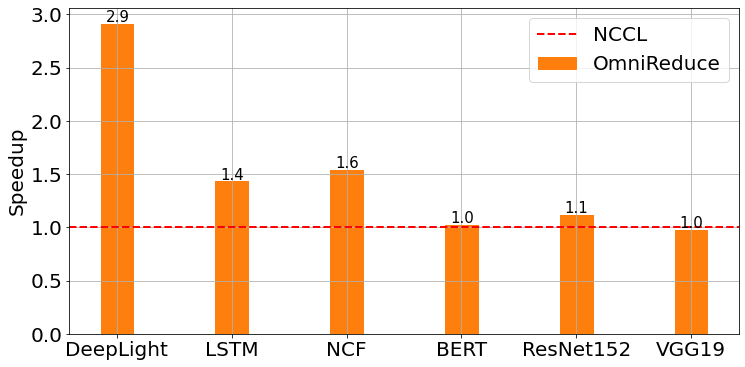

In [55]:
x = ['DeepLight', 'LSTM', 'NCF', 'BERT', 'ResNet152', 'VGG19']
speedups = []
for l in x:
    func = 'parse_'+l+'_log'
    speedups.append(eval(func)('NCCL')/eval(func)('omnireduce'))
fig, (ax) = plt.subplots(1,1)
fig.set_size_inches(12,6)
ax.bar(x, speedups, width=0.3, edgecolor='white', label='OmniReduce', color='#ff7f0e')
for u, v in enumerate(speedups):
    ax.text(u-0.1, v + 0.01, str(round(v,1)), fontsize=15, zorder=99)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.axhline(y=1, linewidth=2, color='r', linestyle='--', label='NCCL')
ax.set_ylabel('Speedup', fontsize=20)
plt.legend(fontsize=20)
plt.grid()
plt.show()